In [7]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime
import pandas
import requests
# import cdsapi

In [3]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

In [4]:
my_string = "2024-06-21"

# create date object in given time format yyyy-mm-dd
launch_date = datetime.datetime.strptime(my_string, "%Y-%m-%d")

env.set_date(
    (launch_date.year, launch_date.month, launch_date.day, 12)
)  # hour given in UTC

In [ ]:
# c = cdsapi.Client()
# c.retrieve("reanalysis-era5-complete", {
#     "class": "ea",
#     "date": "2024-04-05",
#     "expver": "1",
#     "levelist": "100/300/500/700/1000",
#     "levtype": "pl",
#     "number": "0/1/2/3/4/5/6/7/8/9",
#     "param": "60.128/129.128/130.128/131/132/135.128/138.128/155.128",
#     "stream": "oper",
#     "time": "12:00:00",
#     "type": "an",
#     "format": "netcdf"
# }, "output.nc")



# c = cdsapi.Client()
# c.retrieve(
#     "reanalysis-era5-pressure-levels",
#     {
#         "product_type": "reanalysis",
#         "format": "netcdf",
#         "variable": [
#             "geopotential", "temperature", "u_component_of_wind",
#             "v_component_of_wind", "vertical_velocity",
#             "vorticity"
#         ],
#         "pressure_level": [
#             "100", "300", "500", "700", "1000"
#         ],
#         "year": "2024",
#         "month": "04",
#         "day": "05",
#         "time": "12:00",
#         "area": [90, -180, -90, 180], # North, West, South, East (global)
#         "grid": [0.25, 0.25], # Output grid resolution
#     },
#     "output.nc"
# )



# c = cdsapi.Client()
# c.retrieve(
# 'reanalysis-era5-pressure-levels',
#         {
#             'product_type': 'reanalysis',
#             'format': "netcdf",
#             'variable': [
#             "geopotential", "temperature", "u_component_of_wind",
#             "v_component_of_wind", "vertical_velocity",
#             "vorticity"
#         ],
#             'pressure_level': '1000',
#             'year': '2024',
#             'month': '06',
#             'day': '21',
#             'time': ['11:00', '12:00', '13:00'],
#             'area': [90, -180, -90, 180], # North, West, South, East (global)
#             'grid': [0.25, 0.25], # Output grid resolution
#         },
#
#     'download.nc')

2024-07-20 10:52:10,020 INFO Welcome to the CDS
2024-07-20 10:52:10,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-07-20 10:52:10,164 INFO Request is queued


In [14]:
# doing this to intercept and handle the request before it reaches the rocketpy environment
# monkey-patching the requests lib to disable ssl verification
def patch_requests():
    original_get = requests.get

    def custom_get(*args, **kwargs):
        kwargs['verify'] = False
        return original_get(*args, **kwargs)

    requests.get = custom_get

# Apply the patch
patch_requests()

URL = "https://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR=2024&MONTH=06&FROM=2112&TO=2112&STNM=72364"

env.set_atmospheric_model(
    type="wyoming_sounding",
    file=URL
)

# response = requests.get(URL, verify=False)
# env.set_atmospheric_model(type="wyoming_sounding", file=URL)

c:\Users\danie\Documents\projects\Rocketpy-playground\.conda\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'weather.uwyo.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Gravity Details

Acceleration of gravity at surface level:    9.7918 m/s²
Acceleration of gravity at   3.048 km (ASL): 9.7863 m/s²


Launch Site Details

Launch Date: 2024-06-21 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1252.0 m


Atmospheric Model Details

Atmospheric Model Type: wyoming_sounding
wyoming_sounding Maximum Height: 3.048 km


Surface Atmospheric Conditions

Surface Wind Speed: 6.69 m/s
Surface Wind Direction: 125.00°
Surface Wind Heading: 305.00°
Surface Pressure: 877.00 hPa
Surface Temperature: 296.35 K
Surface Air Density: 1.031 kg/m³
Surface Speed of Sound: 345.10 m/s


Earth Model Details

Earth Radius at Launch site: 6371.83 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



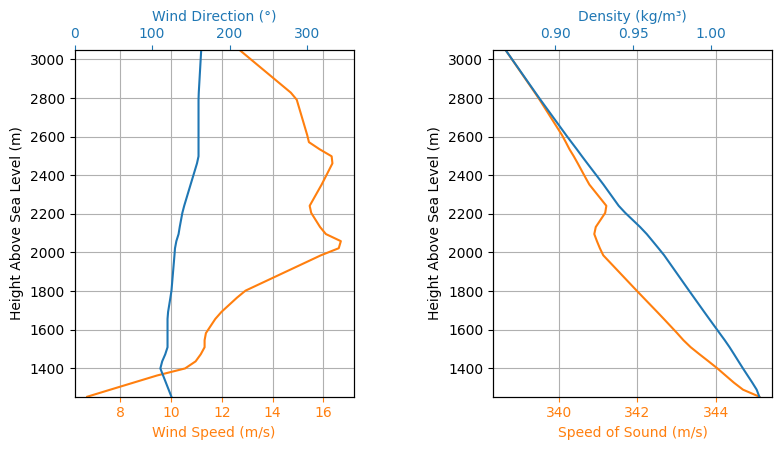

In [15]:
env.max_expected_height = 3048  # adjust the plots to this height
env.info()